In [8]:
%load_ext watermark
%watermark
import pandas as pd
import numpy as np
from sklearn.linear_model  import LinearRegression

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2018-11-13T21:05:31+01:00

CPython 3.7.0
IPython 6.5.0

compiler   : MSC v.1912 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [9]:
variables_independientes=pd.read_csv("C:/Users/alvar/Documents/DataScientis/Visualizar Datos/boston_dataset.csv",
               usecols=["CRIM","ZN","INDUS", "CHAS","NOX", "RM", "AGE","DIS","RAD","TAX", "PTRATIO", "B"])
variable_objetivo=df=pd.read_csv("C:/Users/alvar/Documents/DataScientis/Visualizar Datos/boston_dataset.csv",
               usecols=["MEDV"])


In [11]:
from sklearn.linear_model import LinearRegression
boston=pd.read_csv("C:/Users/alvar/Documents/DataScientis/Visualizar Datos/boston_dataset.csv")
modelo=LinearRegression()
modelo.fit(X=variables_independientes, y=variable_objetivo)
boston["Precio_predic"]=modelo.predict(variables_independientes)
boston.head()

#datos_numericos =df.select_dtypes(np.number).fillna(0)




,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Precio_predic
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,27.814871
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,23.878926
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,29.334918
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,27.177620
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,27.724583


In [12]:
boston[["MEDV","Precio_predic"]]

,MEDV,Precio_predic
0,24.0,27.814871
1,21.6,23.878926
2,34.7,29.334918
3,33.4,27.177620
4,36.2,27.724583
5,28.7,23.089229
6,22.9,22.898396
7,22.1,21.896787
8,16.5,18.041253
9,18.9,20.184712


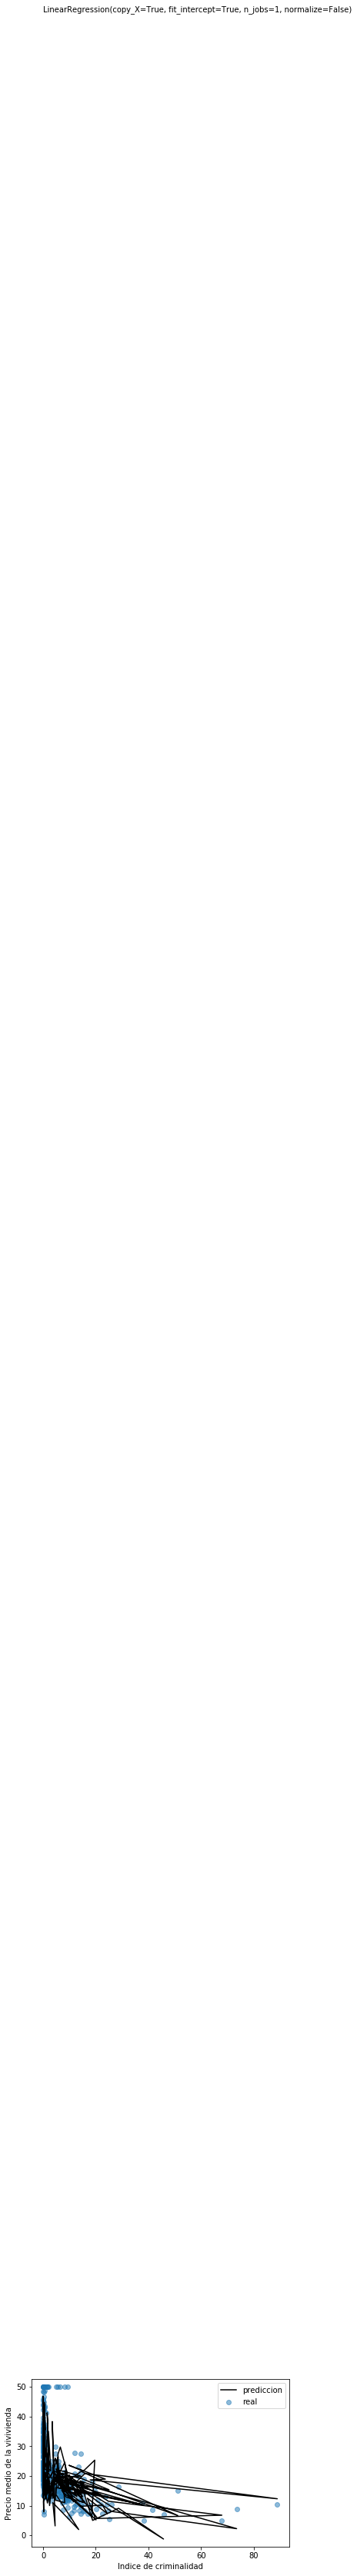

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(variables_independientes["CRIM"], boston.MEDV, alpha=0.5, label="real")
plt.text(0.1, 850, modelo)
plt.plot(variables_independientes["CRIM"], boston.Precio_predic, c="black", label='prediccion')
plt.xlabel("Indice de criminalidad")
plt.ylabel("Precio medio de la vivivienda")
plt.legend();

In [58]:
from sklearn import metrics
#Error absoluto medio
print ("Error absoluto medio:", metrics.mean_absolute_error(variable_objetivo,boston["Precio_predic"]))

Error absoluto medio: 3.394374004789835


In [57]:
#Raiz del error cuadrático medio
print("Error R_2 cuadrático medio:", np.sqrt(metrics.mean_squared_error(variable_objetivo,boston["Precio_predic"])))

Error R_2 cuadrático medio: 5.135770906678987


In [53]:
#Coheficiente de determinación
modelo_r2=metrics.r2_score(variable_objetivo,boston["Precio_predic"])
len(modelo.coef_)

1

In [45]:
#Coheficiente de determinación ajustado
modelo_r2_ajustado=1-(1-modelo_r2)*(len(variables_independientes)-1)/(len(variables_independientes)-variable_objetivo.shape[1]-1)
z=variable_objetivo.shape[1]
#*(len(variables_independientes)-1)/(len(variables_dependientes)-variable_independiente.shape[1]-1)
modelo_r2_ajustado

0.6859201670385777